<a href="https://colab.research.google.com/github/RodolfoRaffaele/RodolfoRaffaele/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Walmart.csv')

In [ ]:
df = df.round(decimals=2)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358620,171.578468,7.998831
std,12.988182,5.643666e+05,0.255049,18.444933,0.459097,39.356697,1.876046
min,1.000000,2.099862e+05,0.000000,-2.060000,2.470000,126.060000,3.880000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.930000,131.740000,6.890000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.440000,182.620000,7.870000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.740000,212.745000,8.620000
max,45.000000,3.818686e+06,1.000000,100.140000,4.470000,227.230000,14.310000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<Axes: >

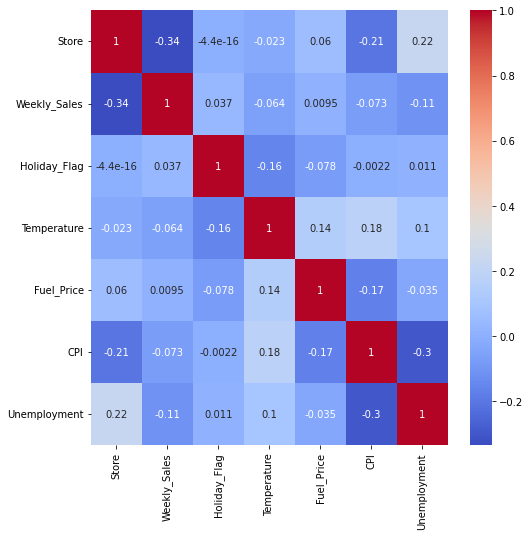

In [ ]:
# Não encontrada correlação entre as variáveis
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True, cmap='coolwarm')

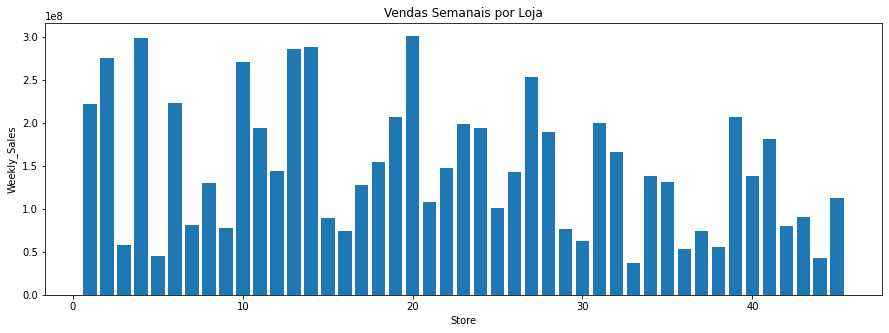

In [ ]:
vendas_loja = df.groupby(['Store'])['Weekly_Sales'].sum()
plt.figure(figsize=(15,5))
plt.bar(vendas_loja.index, vendas_loja.values)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Vendas Semanais por Loja')
plt.show() 

In [ ]:
vendas_Comparacao = df
vendas_Comparacao = px.histogram(df, x = 'Store', y = 'Weekly_Sales',
             color = 'Holiday_Flag', 
             barmode = 'group',
             title = 'Average weekly sales by store on holidays and normal days',
             color_discrete_sequence = ['darkorange', 'black'], 
             template="simple_white",
             histfunc = 'avg')
vendas_Comparacao.show() 

In [ ]:
df2=df

In [ ]:
# Quanto cada loja vendeu no total e a sua média
sells_store = df2.groupby('Store')['Weekly_Sales'].sum()
df2['Total_store'] = df['Store'].map(sells_store).astype(int)
sells_store = df2.groupby('Store')['Weekly_Sales'].mean()
df2['Mean_store'] = df['Store'].map(sells_store)
df2 = df2.round(decimals=2)
df2['Total_store'] = df2['Total_store'].round(2)


In [ ]:
# Separação da data entre: dia, mês e ano. Objetivo separar as vendas por ano.
df2['day'] = df2['Date'].str[0:2].astype('int32')
df2['month'] = df2['Date'].str[3:5].astype('int32')
df2['year'] = df2['Date'].str[6:10].astype('int32')


In [ ]:
# Eliminando colunas que não seriam utilizadas como parâmetro e deixando as colunaa numa ordem de melhor análise.
df3 = df2
df3 = df3.drop(['Date', 'Fuel_Price', 'Temperature','CPI','Unemployment','Holiday_Flag'], axis = 1)
df3 = df3[['Store', 'day',	'month','year',	'Weekly_Sales',	'Total_store', 'Mean_store']]
df3

,Store,day,month,year,Weekly_Sales,Total_store,Mean_store
0,1,5,2,2010,1643690.90,222402808,1555264.40
1,1,12,2,2010,1641957.44,222402808,1555264.40
2,1,19,2,2010,1611968.17,222402808,1555264.40
3,1,26,2,2010,1409727.59,222402808,1555264.40
4,1,5,3,2010,1554806.68,222402808,1555264.40
...,...,...,...,...,...,...,...
6430,45,28,9,2012,713173.95,112395341,785981.41
6431,45,5,10,2012,733455.07,112395341,785981.41
6432,45,12,10,2012,734464.36,112395341,785981.41
6433,45,19,10,2012,718125.53,112395341,785981.41


In [ ]:
# Descobrindo a venda Total e a Média da rede Walmart, com o objetivo de identificar lojas com faturamento acima da média nos 3 anos analisados.
df3['Total_wal'] = df3['Weekly_Sales'].sum().astype(int)
df3['Mean_wal'] = df3['Weekly_Sales'].mean().round(2)
df3

,Store,day,month,year,Weekly_Sales,Total_store,Mean_store,Total_wal,Mean_wal
0,1,5,2,2010,1643690.90,222402808,1555264.40,6737218987,1046964.88
1,1,12,2,2010,1641957.44,222402808,1555264.40,6737218987,1046964.88
2,1,19,2,2010,1611968.17,222402808,1555264.40,6737218987,1046964.88
3,1,26,2,2010,1409727.59,222402808,1555264.40,6737218987,1046964.88
4,1,5,3,2010,1554806.68,222402808,1555264.40,6737218987,1046964.88
...,...,...,...,...,...,...,...,...,...
6430,45,28,9,2012,713173.95,112395341,785981.41,6737218987,1046964.88
6431,45,5,10,2012,733455.07,112395341,785981.41,6737218987,1046964.88
6432,45,12,10,2012,734464.36,112395341,785981.41,6737218987,1046964.88
6433,45,19,10,2012,718125.53,112395341,785981.41,6737218987,1046964.88


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

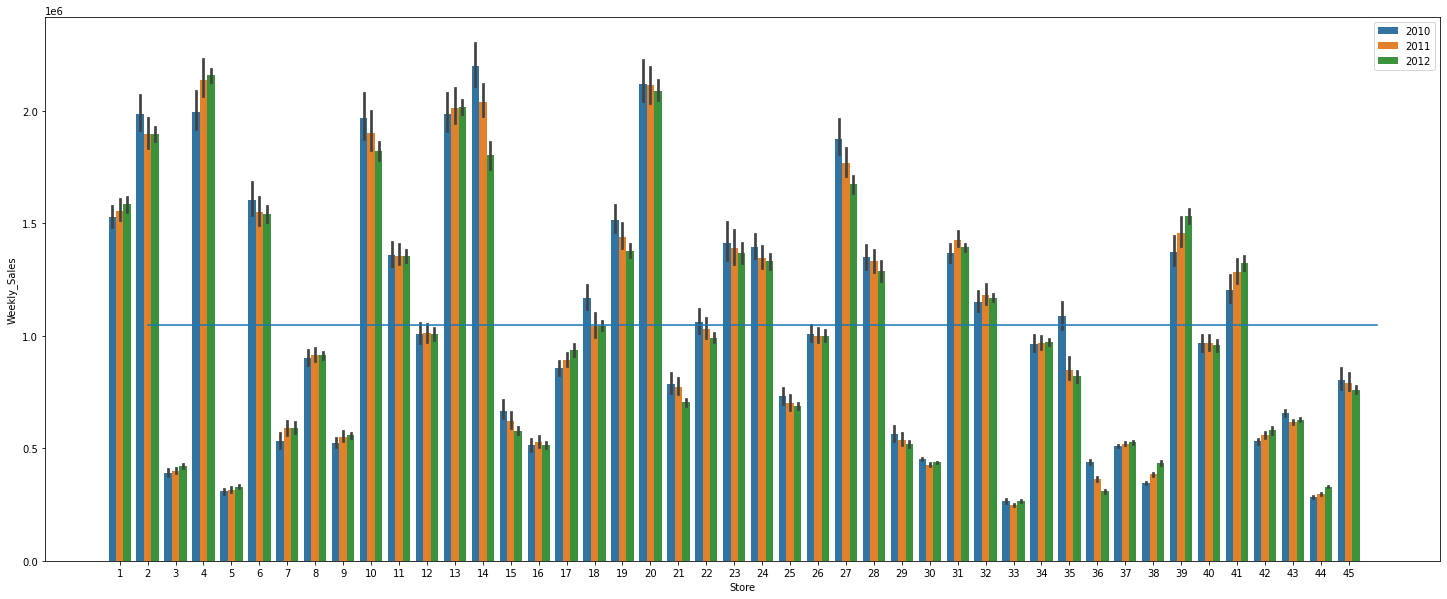

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data= df3, x= 'Store', y= 'Weekly_Sales', hue= 'year') 
sns.lineplot(data=df3,x='Store',y='Mean_wal',)

In [ ]:
# Excluindo lojas que possuem a somatória de vendas abaixo da média do Walmart
df3['Delete'] = df3.apply(lambda row: 'Delete' if (row['Mean_store'] < row['Mean_wal'] != '') else '', axis=1)
to_delete = df3[df3['Delete'] != '']
df3.drop(to_delete.index, inplace=True)
df3 = df3.drop('Delete', axis=1)

In [ ]:
df4=df3


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

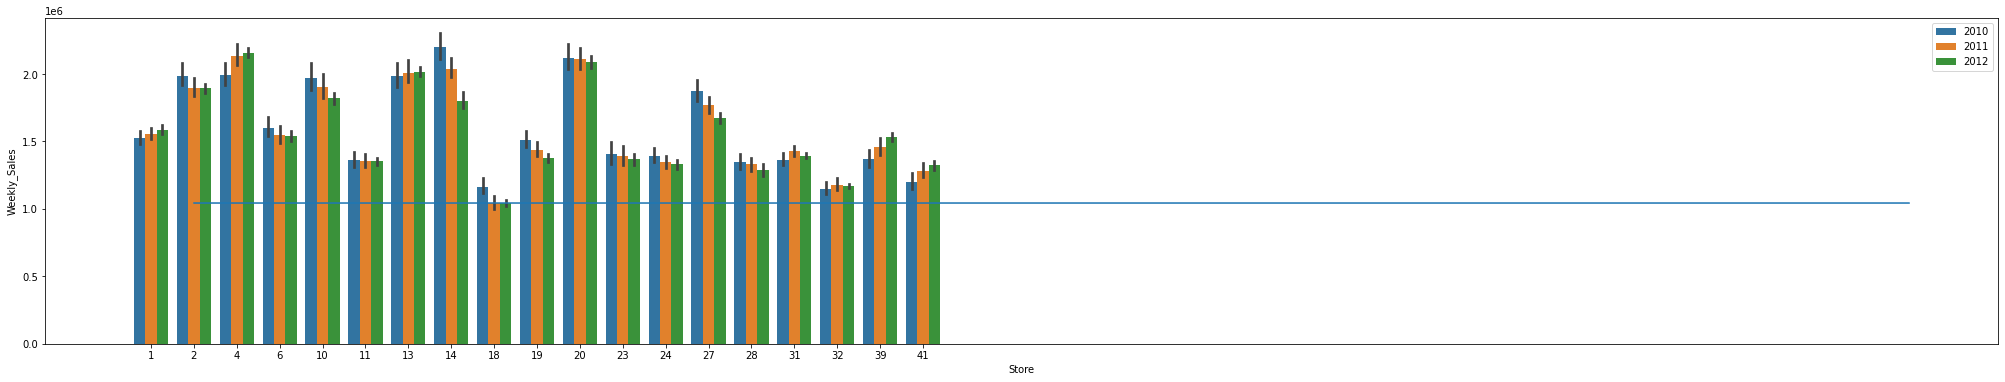

In [ ]:
plt.figure(figsize = (35,6))
sns.barplot(data= df4, x= 'Store', y= 'Weekly_Sales', hue= 'year') 
sns.lineplot(data=df4,x='Store',y='Mean_wal',)

In [ ]:
df_store_4 = df2[df2.Store == 4]
df_store_4

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Total_store,Mean_store,day,month,year
429,4,05-02-2010,2135143.87,0,43.76,2.60,126.44,8.62,299543953,2094712.96,5,2,2010
430,4,12-02-2010,2188307.39,1,28.84,2.57,126.50,8.62,299543953,2094712.96,12,2,2010
431,4,19-02-2010,2049860.26,0,36.45,2.54,126.53,8.62,299543953,2094712.96,19,2,2010
432,4,26-02-2010,1925728.84,0,41.36,2.59,126.55,8.62,299543953,2094712.96,26,2,2010
433,4,05-03-2010,1971057.44,0,43.49,2.65,126.58,8.62,299543953,2094712.96,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,4,28-09-2012,2027620.23,0,71.74,3.67,131.04,4.08,299543953,2094712.96,28,9,2012
568,4,05-10-2012,2209835.43,0,63.07,3.62,131.08,3.88,299543953,2094712.96,5,10,2012
569,4,12-10-2012,2133026.07,0,57.11,3.60,131.11,3.88,299543953,2094712.96,12,10,2012
570,4,19-10-2012,2097266.85,0,64.46,3.61,131.15,3.88,299543953,2094712.96,19,10,2012


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

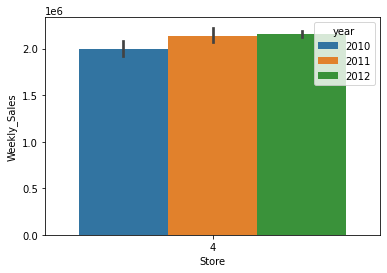

In [ ]:
sns.barplot(data= df_store_4, x= 'Store', y= 'Weekly_Sales', hue= 'year') 